In [5]:
import matplotlib.pyplot as plt
from helpers.cm26 import DatasetCM26, remesh
from helpers.computational_tools import select_NA, select_Pacific, StateFunctions, compare
from helpers.ann_tools import ANN, import_ANN
import numpy as np
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
ds = DatasetCM26()

In [7]:
%time training_dataset = ds.sample_epoch(time=np.random.randint(8035))

CPU times: user 6.4 s, sys: 1.99 s, total: 8.39 s
Wall time: 7.74 s


Correlation: 0.36346658850736585
Relative Error: 2.437188241806459
R2 =  -4.18490476988839
R2 max =  0.13210952329411585
Optinal scaling: 0.14888868192864546
Nans: 0
Correlation: 0.3983253589208349
Relative Error: 1.7340799595530783
R2 =  -1.458409200667647
R2 max =  0.1586614207786179
Optinal scaling: 0.238522039443337
Nans: 0
Correlation: 0.42436972051033744
Relative Error: 1.5007732080867362
R2 =  -1.1346961170889784
R2 max =  0.18008781800984297
Optinal scaling: 0.270124401637318
Nans: 0


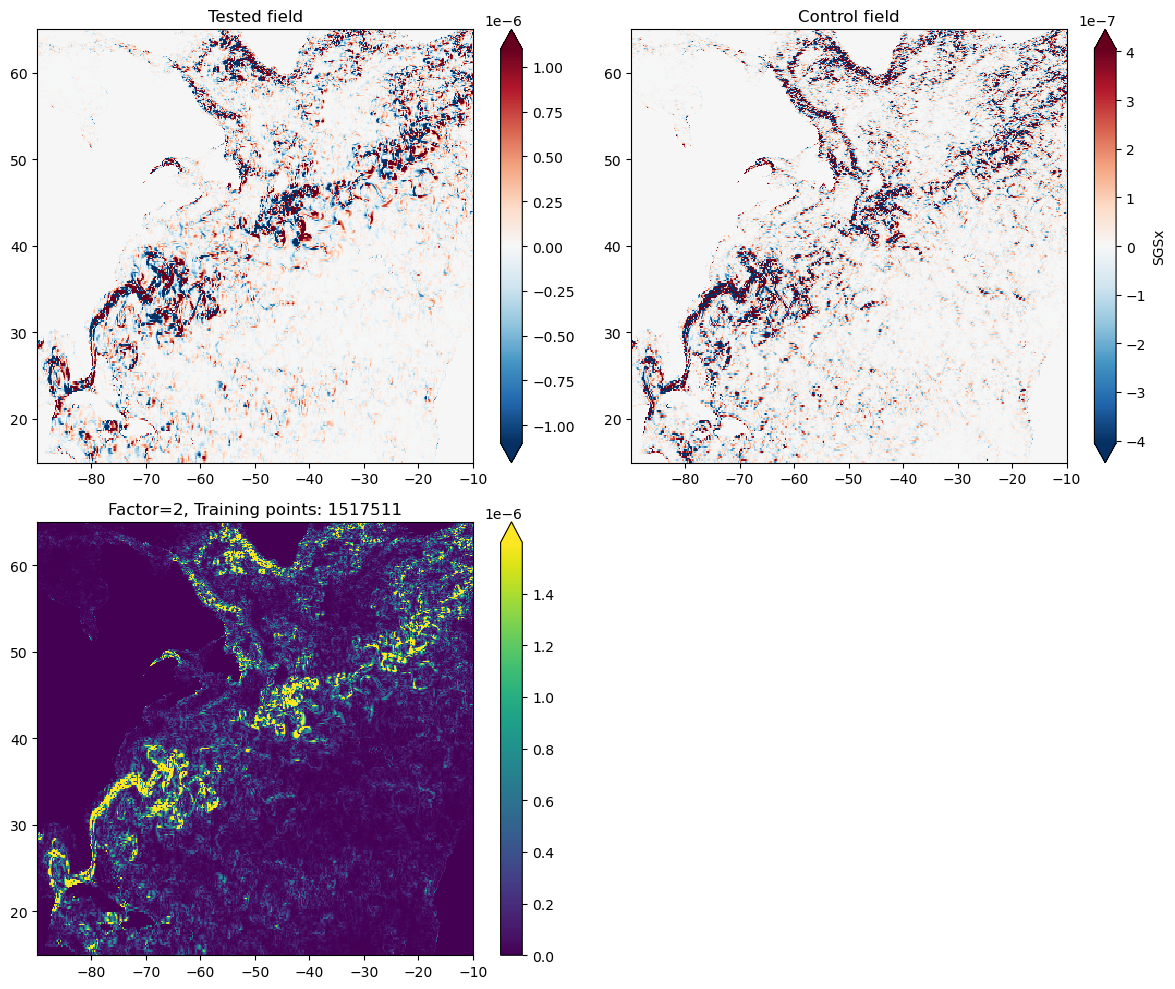

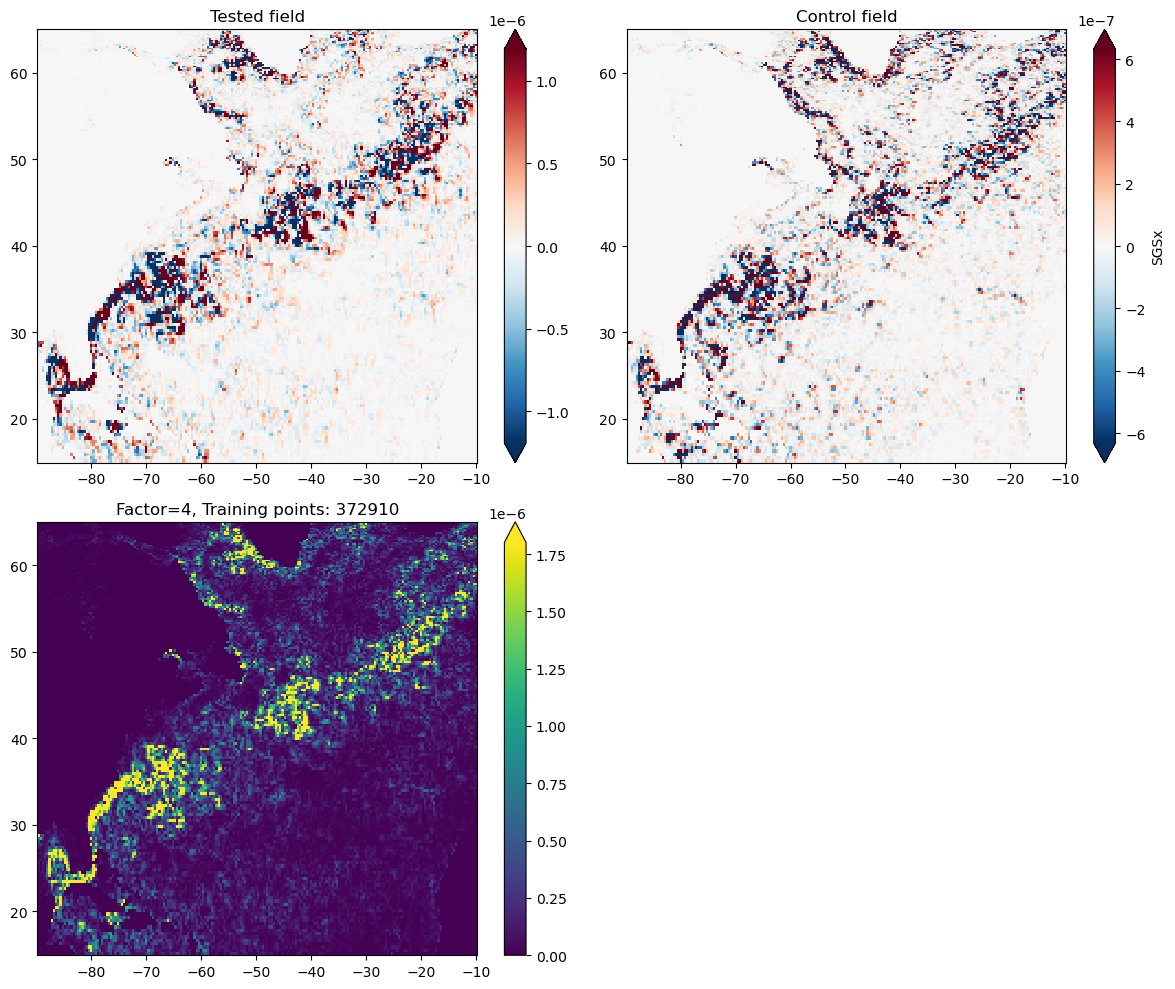

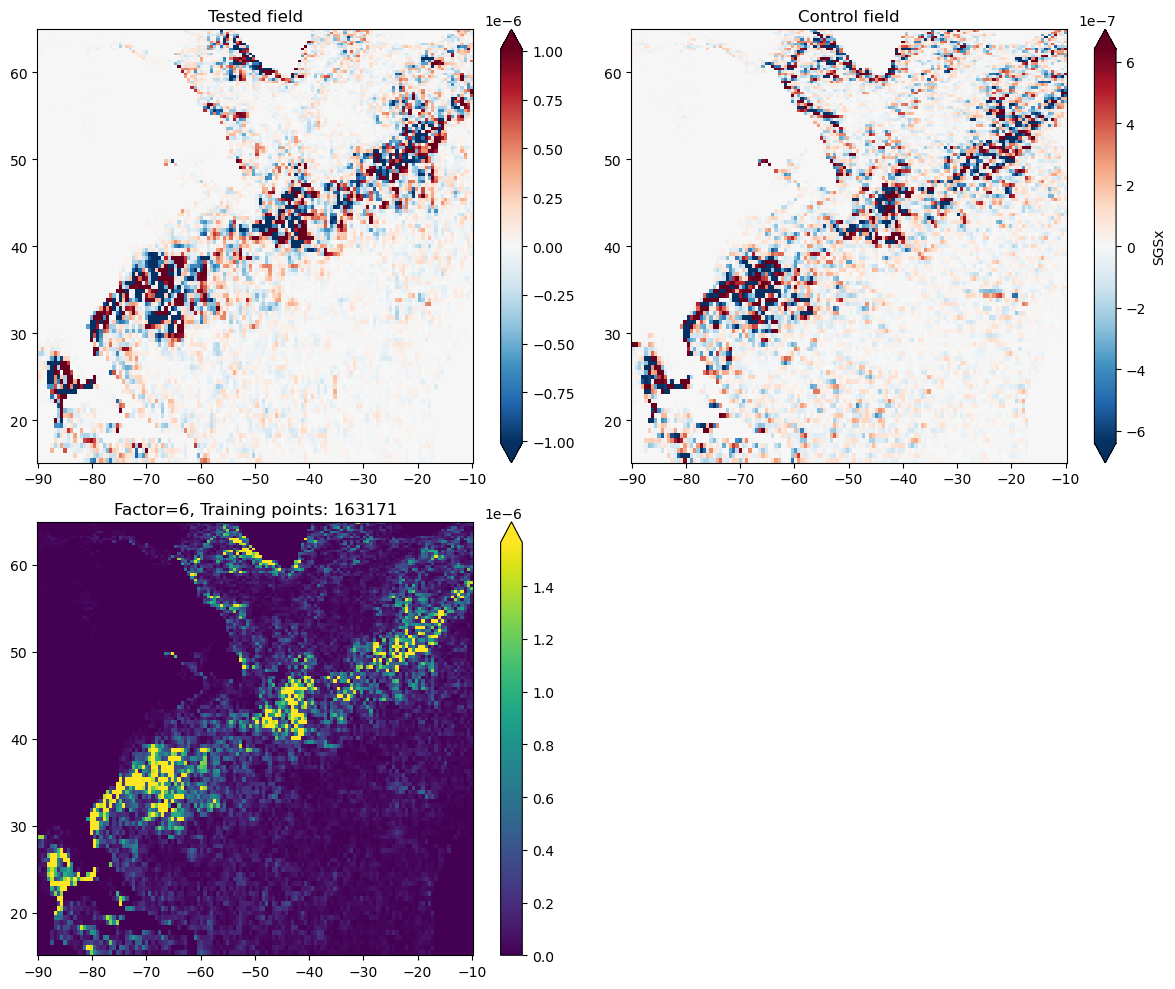

In [16]:
for factor in [2,4,6]:
    data = training_dataset[factor].data
    compare(training_dataset[factor].state.ZB20()['ZB20u'], data.SGSx)
    num_points = int(training_dataset[factor].param.wet.sum())
    plt.title(f'Factor={factor}, Training points: {num_points}')

# Check shape of 3x3 patches

In [17]:
from helpers.ann_tools import image_to_3x3_stencil_gpt

In [35]:
image = torch.tensor(np.arange(20)).reshape(4,5)

In [36]:
print(image)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])


In [37]:
image.shape

torch.Size([4, 5])

In [38]:
image[0]

tensor([0, 1, 2, 3, 4])

In [39]:
image_to_3x3_stencil_gpt(image)

tensor([[ 0,  1,  2,  5,  6,  7, 10, 11, 12],
        [ 1,  2,  3,  6,  7,  8, 11, 12, 13],
        [ 2,  3,  4,  7,  8,  9, 12, 13, 14],
        [ 5,  6,  7, 10, 11, 12, 15, 16, 17],
        [ 6,  7,  8, 11, 12, 13, 16, 17, 18],
        [ 7,  8,  9, 12, 13, 14, 17, 18, 19]])

That is, the fast index (rightmost) remains fast index in the patch. Both indices are in increaseing order. Moreover, the order in which path is moving is again first rightmost, then leftmost. 

These indices are consistent with ordering in Fortrain: we have fast zonal and slow meridional.